# PROJEKT MACHINE LEARNING
## PROPOZYCJA ROZWIĄZANIA
## https://www.kaggle.com/uciml/mushroom-classification

### import paczek

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix

### pobranie danych

In [2]:
data = pd.read_csv('mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### zapoznanie z danymi

#### opis kategorii


Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
data.shape

(8124, 23)

In [7]:
data.count()

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-type                   8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

([<matplotlib.patches.Wedge at 0x16d8283c708>,
 [Text(-0.062071904545809166, 1.0982472757380535, 'edible'),
  Text(0.062071904545808784, -1.0982472757380535, 'poisonous')],
 [Text(-0.03385740247953227, 0.5990439685843927, '51.8%'),
  Text(0.03385740247953206, -0.5990439685843928, '48.2%')])

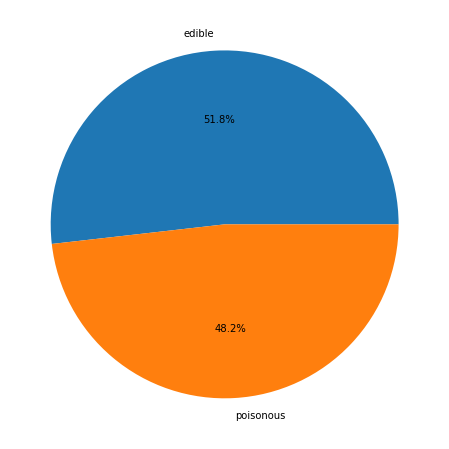

In [8]:
plt.figure(figsize=(8,8))
plt.pie(data['class'].value_counts(), labels=['edible','poisonous'], autopct='%1.1f%%')

In [9]:
cols = data.columns

In [10]:
for col in cols:
    print(data[col].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

### przekodowanie danych

In [11]:
le = LabelEncoder()

In [12]:
data_enc = data.apply(le.fit_transform)
data_enc.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'cap-shape'}>,
        <AxesSubplot:title={'center':'cap-surface'}>,
        <AxesSubplot:title={'center':'cap-color'}>,
        <AxesSubplot:title={'center':'bruises'}>],
       [<AxesSubplot:title={'center':'odor'}>,
        <AxesSubplot:title={'center':'gill-attachment'}>,
        <AxesSubplot:title={'center':'gill-spacing'}>,
        <AxesSubplot:title={'center':'gill-size'}>,
        <AxesSubplot:title={'center':'gill-color'}>],
       [<AxesSubplot:title={'center':'stalk-shape'}>,
        <AxesSubplot:title={'center':'stalk-root'}>,
        <AxesSubplot:title={'center':'stalk-surface-above-ring'}>,
        <AxesSubplot:title={'center':'stalk-surface-below-ring'}>,
        <AxesSubplot:title={'center':'stalk-color-above-ring'}>],
       [<AxesSubplot:title={'center':'stalk-color-below-ring'}>,
        <AxesSubplot:title={'center':'veil-type'}>,
        <AxesSubplot:title={'center':'veil-color'}>,


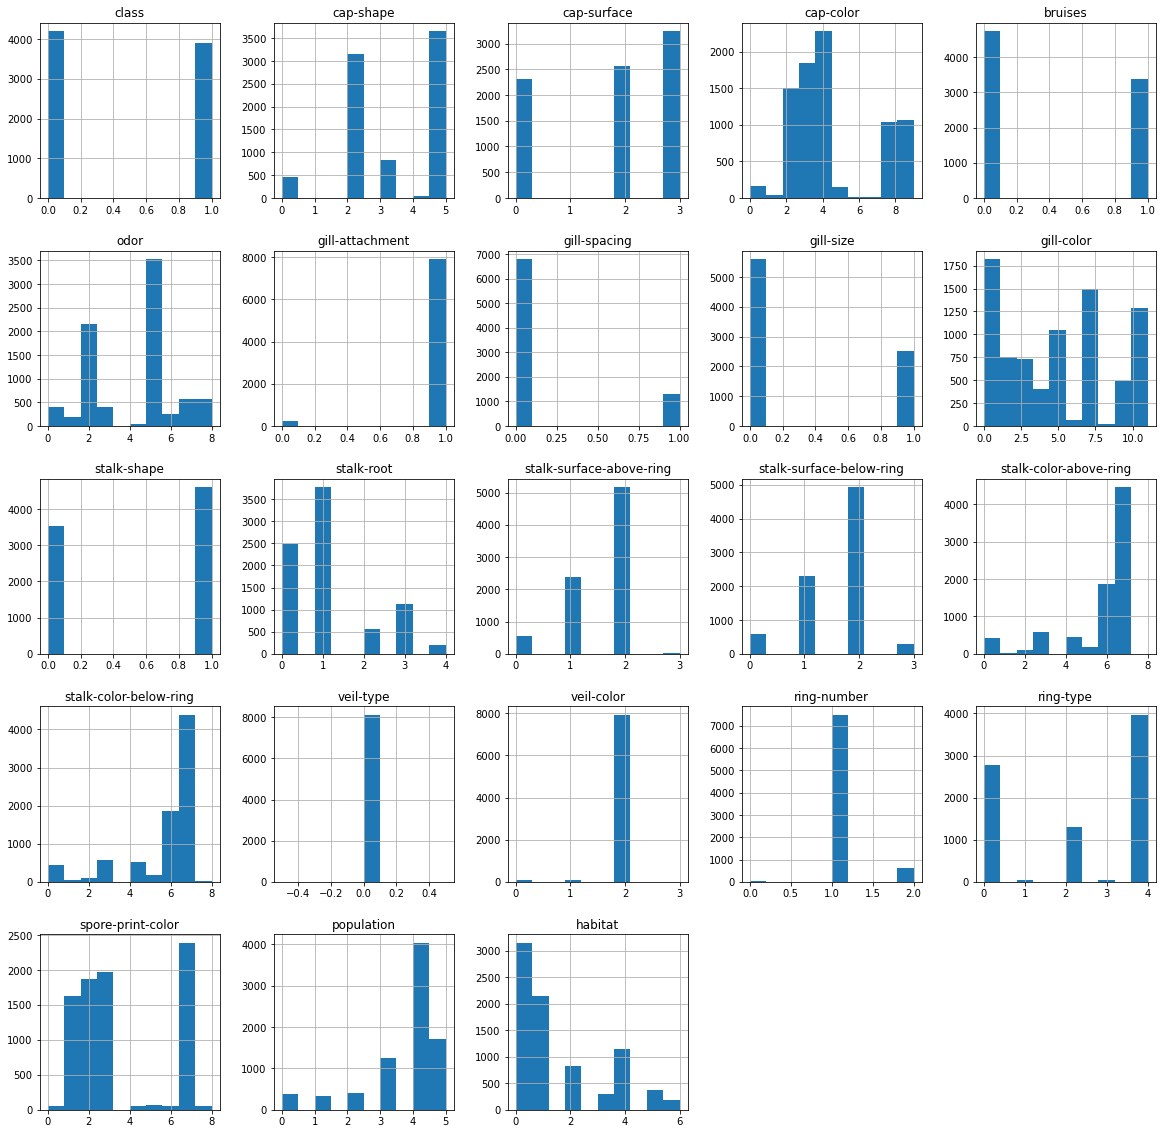

In [21]:
data_enc.hist(figsize=(20,20))

In [13]:
for col in cols:
    print(data_enc[col].value_counts())

0    4208
1    3916
Name: class, dtype: int64
5    3656
2    3152
3     828
0     452
4      32
1       4
Name: cap-shape, dtype: int64
3    3244
2    2556
0    2320
1       4
Name: cap-surface, dtype: int64
4    2284
3    1840
2    1500
9    1072
8    1040
0     168
5     144
1      44
6      16
7      16
Name: cap-color, dtype: int64
0    4748
1    3376
Name: bruises, dtype: int64
5    3528
2    2160
8     576
7     576
0     400
3     400
6     256
1     192
4      36
Name: odor, dtype: int64
1    7914
0     210
Name: gill-attachment, dtype: int64
0    6812
1    1312
Name: gill-spacing, dtype: int64
0    5612
1    2512
Name: gill-size, dtype: int64
0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: gill-color, dtype: int64
1    4608
0    3516
Name: stalk-shape, dtype: int64
1    3776
0    2480
3    1120
2     556
4     192
Name: stalk-root, dtype: int64
2    5176
1    2372
0     552
3      24
Name

In [14]:
data_enc = data_enc.drop(['veil-type'], axis=1)

In [15]:
data_corr = data_enc.corr()

In [16]:
data_corr

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'class'),
  Text(0, 1.5, 'cap-shape'),
  Text(0, 2.5, 'cap-surface'),
  Text(0, 3.5, 'cap-color'),
  Text(0, 4.5, 'bruises'),
  Text(0, 5.5, 'odor'),
  Text(0, 6.5, 'gill-attachment'),
  Text(0, 7.5, 'gill-spacing'),
  Text(0, 8.5, 'gill-size'),
  Text(0, 9.5, 'gill-color'),
  Text(0, 10.5, 'stalk-shape'),
  Text(0, 11.5, 'stalk-root'),
  Text(0, 12.5, 'stalk-surface-above-ring'),
  Text(0, 13.5, 'stalk-surface-below-ring'),
  Text(0, 14.5, 'stalk-color-above-ring'),
  Text(0, 15.5, 'stalk-color-below-ring'),
  Text(0, 16.5, 'veil-color'),
  Text(0, 17.5, 'ring-number'),
  Text(0, 18.5, 'ring-type'),
  Text(0, 19.5, 'spore-print-color'),
  Text(0, 20.5, 'population'),
  Text(0, 21.5, 'habitat')])

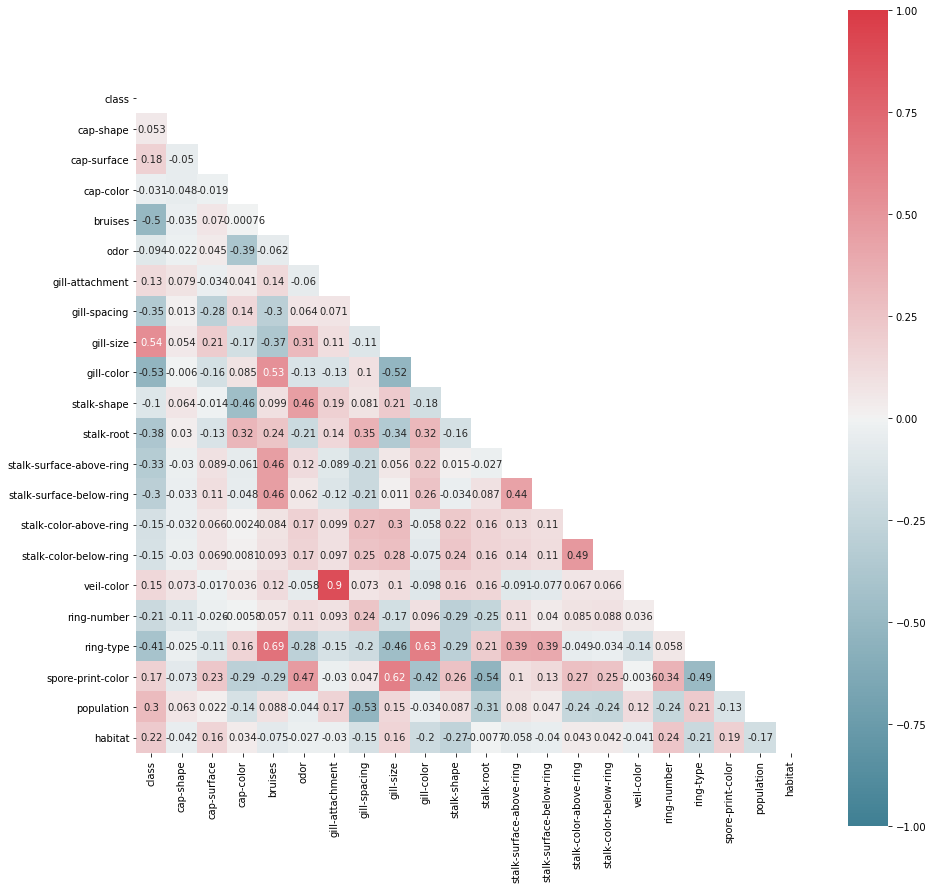

In [17]:
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15,15))
sns.heatmap(data_corr, vmax = 1, vmin=-1, cmap= cmap, center = 0, square = True, annot = True, mask= mask)
plt.yticks(rotation = 'horizontal')


In [18]:
target = np.array(data_enc['class'])
target

array([1, 0, 0, ..., 0, 1, 0])

In [19]:
data_d = data_enc.drop(['class'], axis=1)
data_d = np.array(data_d)
data_d = MinMaxScaler().fit_transform(data_d)
data_d

array([[1.        , 0.66666667, 0.44444444, ..., 0.25      , 0.6       ,
        0.83333333],
       [1.        , 0.66666667, 1.        , ..., 0.375     , 0.4       ,
        0.16666667],
       [0.        , 0.66666667, 0.88888889, ..., 0.375     , 0.4       ,
        0.5       ],
       ...,
       [0.4       , 0.66666667, 0.44444444, ..., 0.        , 0.2       ,
        0.33333333],
       [0.6       , 1.        , 0.44444444, ..., 0.875     , 0.8       ,
        0.33333333],
       [1.        , 0.66666667, 0.44444444, ..., 0.5       , 0.2       ,
        0.33333333]])

In [20]:
cm = {
    "logit": LogisticRegression(solver='liblinear'),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(),
    "xgboost": XGBClassifier(),
    "bayes": GaussianNB(),
    "svm": SVC(),
    "knn": KNeighborsClassifier()
}

In [21]:
def Modeluj(model_list, data, target):
    
    model_name = []
    model_score1 = []
    model_score2 = []
    model_score3 = []
    
    X_train, X_val, y_train, y_val = train_test_split(
    data,
    target,
    test_size=0.2,
    random_state=123
    )
    
    
    for key, value in model_list.items():
        model = value
        model.fit(X_train, y_train)
        score1 = model.score(X_train, y_train)
        score2 = model.score(X_val, y_val)
        
        model_name.append(key)
        model_score1.append(score1)
        model_score2.append(score2)

    for i in range(7):
        print('Model: {:13s} train score: {:2.15f}, test score: {:2.15f}'.format(model_name[i], model_score1[i], model_score2[i]))
        
    plt.figure(figsize=(11,6))
    plt.bar(model_name, model_score1)
    plt.title('Model score dla treningu')
    plt.show()
    plt.figure(figsize=(11,6))
    plt.bar(model_name, model_score2)
    plt.title('Model score dla testu')
    plt.show()
    

Model: logit         train score: 0.949530697030312, test score: 0.947076923076923
Model: decision_tree train score: 1.000000000000000, test score: 1.000000000000000
Model: random_forest train score: 1.000000000000000, test score: 1.000000000000000
Model: xgboost       train score: 1.000000000000000, test score: 1.000000000000000
Model: bayes         train score: 0.922757347284198, test score: 0.906461538461538
Model: svm           train score: 0.999230650869364, test score: 0.997538461538461
Model: knn           train score: 1.000000000000000, test score: 1.000000000000000


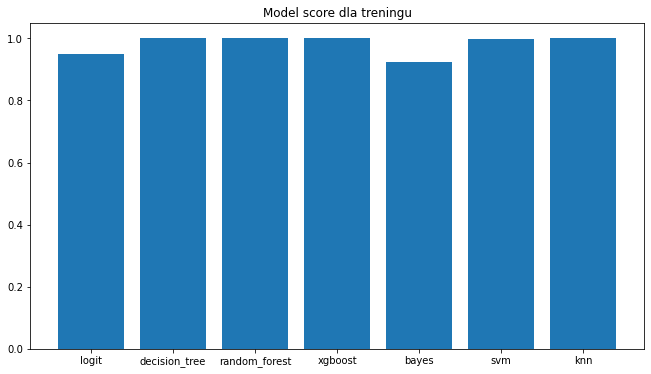

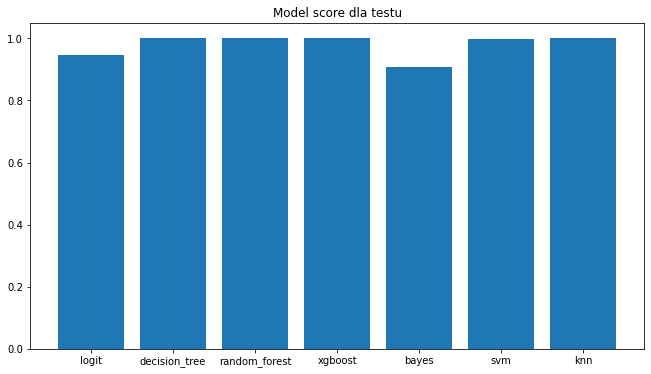

In [148]:
Modeluj(cm, data_d, target)

## Analiza modeli, dla których nie uzyskano 1.0

In [22]:
X_train, X_val, y_train, y_val = train_test_split(
    data_d,
    target,
    test_size=0.2,
    random_state=123
    )

### Regresja logistyczna

In [23]:
grid_model = LogisticRegression(max_iter=10000)
grid_param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],  'penalty':["l1","l2"], 'solver': ['liblinear']}

In [24]:
grid_log = GridSearchCV(grid_model, grid_param, verbose=5, refit=True, cv=5, n_jobs=-1)

In [25]:
grid_log_result = grid_log.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   48.0s finished


In [26]:
grid_log_result.best_estimator_

LogisticRegression(C=10000, max_iter=10000, solver='liblinear')

In [27]:
grid_log_result.best_params_

{'C': 10000, 'penalty': 'l2', 'solver': 'liblinear'}

In [28]:
grid_log_result.best_score_

0.9673789305382838

In [29]:
y_val_pred = grid_log_result.predict(X_val)

In [30]:
accuracy_score(y_val, y_val_pred)

0.9649230769230769

In [31]:
cm_val = confusion_matrix(
    y_true=y_val,
    y_pred=y_val_pred
)
cm_val

array([[837,  26],
       [ 31, 731]], dtype=int64)

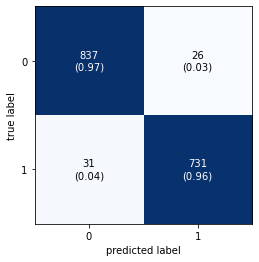

In [32]:
plot_confusion_matrix(confusion_matrix(y_val, y_val_pred), show_normed=True)
plt.show()

In [33]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       863
           1       0.97      0.96      0.96       762

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



### Bayes

In [34]:
model_bayes = GaussianNB()

In [35]:
model_bayes.fit(X_train, y_train)

GaussianNB()

In [37]:
y_val_pred = model_bayes.predict(X_val)

In [38]:
cm_val = confusion_matrix(
    y_true=y_val,
    y_pred=y_val_pred
)
cm_val

array([[786,  77],
       [ 75, 687]], dtype=int64)

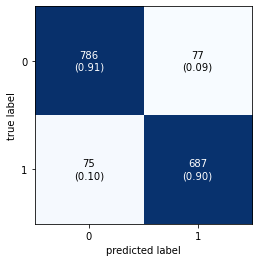

In [39]:
plot_confusion_matrix(confusion_matrix(y_val, y_val_pred), show_normed=True)
plt.show()

In [40]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       863
           1       0.90      0.90      0.90       762

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625



### SVM

In [41]:
model_svc = SVC()

In [42]:
grid_param = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 

In [43]:
grid_svc = GridSearchCV(model_svc, grid_param, verbose=5, refit=True, cv=5, n_jobs=-1)

In [44]:
grid_svc_result = grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  1.9min finished


In [45]:
grid_svc_result.best_estimator_

SVC(C=0.1, gamma=1, kernel='poly')

In [46]:
grid_svc_result.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

In [47]:
grid_svc_result.best_score_

1.0

In [48]:
y_val_pred = grid_svc_result.predict(X_val)

In [49]:
accuracy_score(y_val, y_val_pred)

1.0

In [50]:
cm_val = confusion_matrix(
    y_true=y_val,
    y_pred=y_val_pred
)
cm_val

array([[863,   0],
       [  0, 762]], dtype=int64)

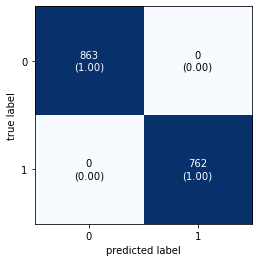

In [52]:
plot_confusion_matrix(confusion_matrix(y_val, y_val_pred), show_normed=True)
plt.show()

In [53]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       762

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [60]:
print(pd.value_counts(y_val))

0    863
1    762
dtype: int64


### Zmniejszenie liczby cech do tych, dla których korelacja jest < -0.2 lub > 0.2

In [61]:
data_corr2 = data_corr.loc[(data_corr['class'] > 0.2) | (data_corr['class'] < -0.2)]

In [66]:
data_corr2_columns = data_corr2.index

In [67]:
data_corr2_columns

Index(['class', 'bruises', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'ring-number', 'ring-type', 'population', 'habitat'],
      dtype='object')

In [73]:
data_e = data_enc[data_corr2_columns]
data_e
data_e = data_e.drop(['class'], axis=1)
data_e = np.array(data_e)
data_e = MinMaxScaler().fit_transform(data_e)
data_e

array([[1.        , 0.        , 1.        , ..., 1.        , 0.6       ,
        0.83333333],
       [1.        , 0.        , 0.        , ..., 1.        , 0.4       ,
        0.16666667],
       [1.        , 0.        , 0.        , ..., 1.        , 0.4       ,
        0.5       ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.2       ,
        0.33333333],
       [0.        , 0.        , 1.        , ..., 0.        , 0.8       ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 1.        , 0.2       ,
        0.33333333]])

Model: logit         train score: 0.937836590244653, test score: 0.932307692307692
Model: decision_tree train score: 1.000000000000000, test score: 1.000000000000000
Model: random_forest train score: 1.000000000000000, test score: 1.000000000000000
Model: xgboost       train score: 1.000000000000000, test score: 1.000000000000000
Model: bayes         train score: 0.908909062932759, test score: 0.905230769230769
Model: svm           train score: 0.991537159563010, test score: 0.992000000000000
Model: knn           train score: 1.000000000000000, test score: 1.000000000000000


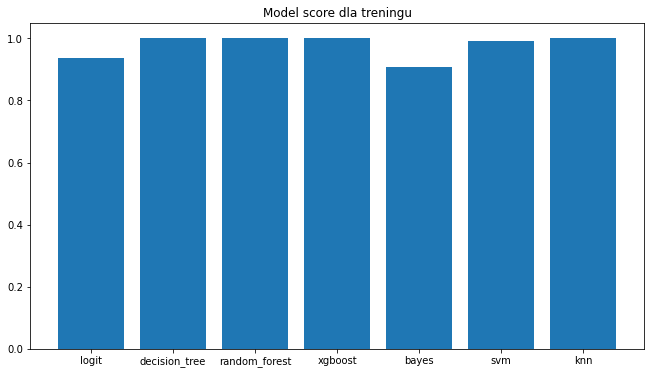

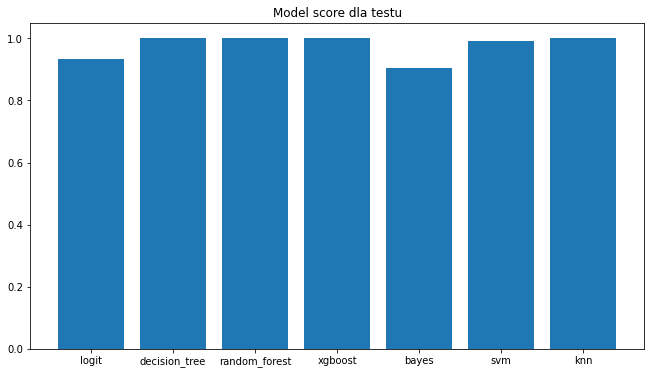

In [74]:
Modeluj(cm, data_e, target)